# Using Parallel Magics

IPython has a few magics for working with your engines.

This assumes you have started an IPython cluster, either with the notebook interface,
or the `ipcluster/controller/engine` commands.

In [1]:
from IPython import parallel
import  os
#os.environ['PATH'] = '/usr/local/ossh/bin:%s' % os.environ['PATH']
rc = parallel.Client(profile="mpi")
#rc = parallel.Client()
dv = rc[:]
dv.block = True
dv

<DirectView [0, 1, 2, 3]>

The parallel magics come from the `parallelmagics` IPython extension.
The magics are set to work with a particular View object,
so to activate them, you call the `activate()` method on a particular view:

In [2]:
dv.activate()

Now we can execute code remotely with `%px`:

In [3]:
%px a=5

In [4]:
%px print a

[stdout:0] 5
[stdout:1] 5
[stdout:2] 5
[stdout:3] 5


In [5]:
%px a

Out[0:12]: 5

Out[1:12]: 5

Out[2:12]: 5

Out[3:12]: 5

In [6]:
%%px
import  socket
print socket.gethostname()

[stdout:0] chewbacca
[stdout:1] chewbacca
[stdout:2] chewbacca
[stdout:3] chewbacca


You don't have to wait for results:

In [7]:
dv.block = False

In [8]:
%px import time
%px time.sleep(5)
%px time.time()

<AsyncResult: execute>

But you will notice that this didn't output the result of the last command.
For this, we have `%result`, which displays the output of the latest request:

In [9]:
%result

Out[0:16]: 1431048116.132016

Out[1:16]: 1431048116.134504

Out[2:16]: 1431048116.154108

Out[3:16]: 1431048116.148505

Remember, an IPython engine is IPython, so you can do magics remotely as well!

In [10]:
dv.block = True
%px %pylab inline

[stdout:0] Populating the interactive namespace from numpy and matplotlib
[stdout:1] Populating the interactive namespace from numpy and matplotlib
[stdout:2] Populating the interactive namespace from numpy and matplotlib
[stdout:3] Populating the interactive namespace from numpy and matplotlib


[stderr:0] 
`%matplotlib` prevents importing * from pylab and numpy
[stderr:1] 
`%matplotlib` prevents importing * from pylab and numpy
[stderr:2] 
`%matplotlib` prevents importing * from pylab and numpy
[stderr:3] 
`%matplotlib` prevents importing * from pylab and numpy


`%%px` can also be used as a cell magic, for submitting whole blocks.
This one acceps `--block` and `--noblock` flags to specify
the blocking behavior, though the default is unchanged.


In [11]:
dv.scatter('id', dv.targets, flatten=True)
dv['stride'] = len(dv)

In [12]:
%%px --noblock
x = linspace(0,pi,1000)
for n in range(id,12, stride):
    print n
    plt.plot(x,sin(n*x))
plt.title("Plot %i" % id)

<AsyncResult: execute>

[stdout:0] 
0
4
8
[stdout:1] 
1
5
9
[stdout:2] 
2
6
10
[stdout:3] 
3
7
11


[output:0]

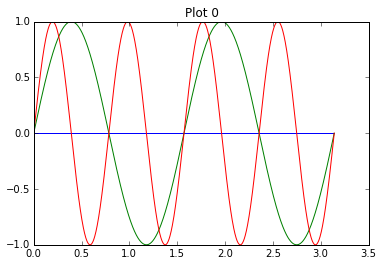

[output:1]

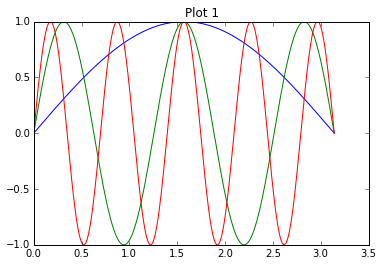

[output:2]

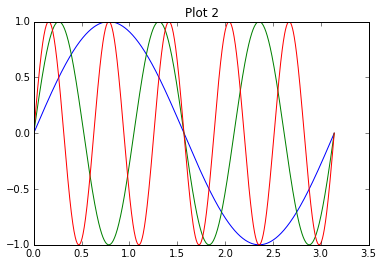

[output:3]

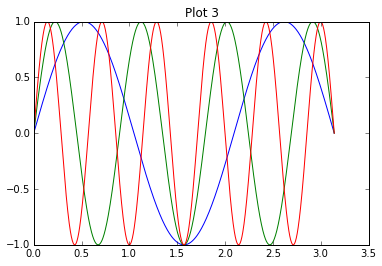

Out[0:18]: <matplotlib.text.Text at 0x7f923cbabd10>

Out[1:18]: <matplotlib.text.Text at 0x7fc2f739fd10>

Out[2:18]: <matplotlib.text.Text at 0x7ff6900bfd10>

Out[3:18]: <matplotlib.text.Text at 0x7ff10d99e690>

In [13]:
%result

It also lets you choose some amount of the grouping of the outputs with `--group-outputs`:

The choices are:

* `engine` - all of an engine's output is collected together
* `type` - where stdout of each engine is grouped, etc. (the default)
* `order` - same as `type`, but individual displaypub outputs are interleaved.
  That is, it will output the first plot from each engine, then the second from each,
  etc.

[stdout:0] 
0
4
8


[output:0]

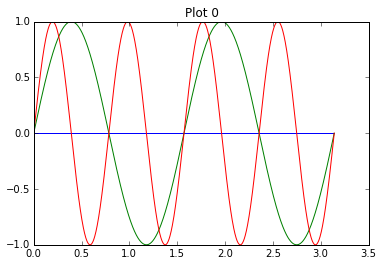

Out[0:19]: <matplotlib.text.Text at 0x7f923cb1a590>

[stdout:1] 
1
5
9


[output:1]

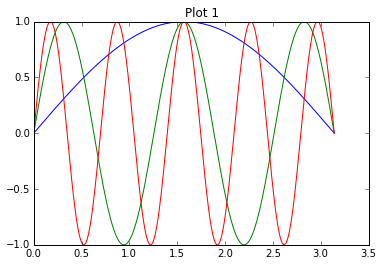

Out[1:19]: <matplotlib.text.Text at 0x7fc2f728d590>

[stdout:2] 
2
6
10


[output:2]

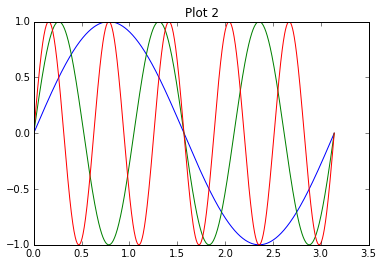

Out[2:19]: <matplotlib.text.Text at 0x7ff68bac6590>

[stdout:3] 
3
7
11


[output:3]

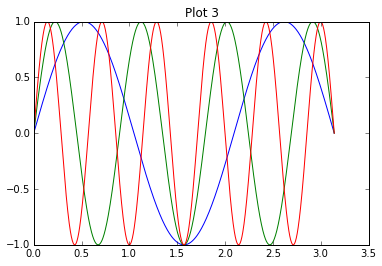

Out[3:19]: <matplotlib.text.Text at 0x7ff10d890750>

In [14]:
%%px --group-outputs=engine
x = linspace(0,pi,1000)
for n in range(id,12, stride):
    print n
    plt.plot(x,sin(n*x))
plt.title("Plot %i" % id)

In [15]:
rc.close()